<a href="https://colab.research.google.com/github/Mateus-cpa/ebac-cadernos-de-atividades/blob/main/M40%20-%20Big%20Data%20-%20processamento%20Spark%20-%20Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Apache Spark;</li>
  <li>Data Wrangling com Spark.</li>
</ol>

---

# **Exercícios**

## 1\. Apache Spark

Replique as atividades do item 2.1 e 2.2 para instalar e configurar um cluster Apache Spark na máquina virtual do Google Colab.

In [7]:
# Download do Spark=3.0.0
%%capture
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop2.7.tgz
!tar xf spark-3.0.0-bin-hadoop2.7.tgz && rm spark-3.0.0-bin-hadoop2.7.tgz


In [8]:
# Download e instalação do Java v8
%%capture
!apt-get remove openjdk*
!apt-get update --fix-missing
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [9]:
# Instalar pyspark
!pip install -q pyspark==3.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 MB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 16.3 MB/s eta 0:00:00


In [10]:
# Configuração da variável de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" # local do java instalado
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7" #local do download do spark


In [11]:
#Conectar Pyspark ao Java
!pip install -q findspark==1.4.2


In [12]:
# Injetar variáveis JAVA_HOME e SPARK_HOME  ao ambiente de execução
import findspark


In [13]:
findspark.init()


In [14]:
#Conexão do clustes, master
from pyspark.sql import SparkSession


In [15]:
#master é o método que informa onde está o cluster
spark = SparkSession.builder.master("local[*]").appName("pyspark-notebook").getOrCreate()
# conteúdo necessário para o spark interagir com o python


## 2\. Data Wrangling

A base de dados presente neste [link](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data) contem dados macroeconômicos sobre o Reino Unido desde o século 13.

**2.1\. Data**

Faça o download dos dados utilizando a máquina virutal do Google Colab com o código abaixo.

In [1]:
!wget -q "https://raw.githubusercontent.com/cluster-apps-on-docker/spark-standalone-cluster-on-docker/master/build/workspace/data/uk-macroeconomic-data.csv" -O "uk-macroeconomic-data.csv"


**2.2. Wrangling**

Processe os dados para que a base de dados final apresente os valores da taxa de desemprego (`Unemployment rate`) e população (`Population (GB+NI)`) estejam ordenados por ano decrescente:

```csv
year,population,unemployment_rate
...,...,...
```

Para isso, utilize:

 - Pandas

In [35]:
import pandas as pd
# ler csv
df = pd.read_csv("uk-macroeconomic-data.csv")

#filtrar colunas
df = df[['Description','Population (GB+NI)','Unemployment rate']]

#renomear colunas
df = df.rename(columns={'Description':'year', 'Population (GB+NI)': 'population', 'Unemployment rate': 'unemployment_rate'})

# excluir linha cujo ano seja 'Units'
df = df[df['year'] != 'Units']


#ordenar por ano decrescente
df = df.sort_values(by='year', ascending=False)
df.head(5)

,year,population,unemployment_rate
808,2016,65573,4.90
807,2015,65110,5.38
806,2014,64597,6.18
805,2013,64106,7.61
804,2012,63705,7.97


In [48]:
# exportar para csv
df.to_csv('uk-macroeconomic-pandas.csv', index=False)

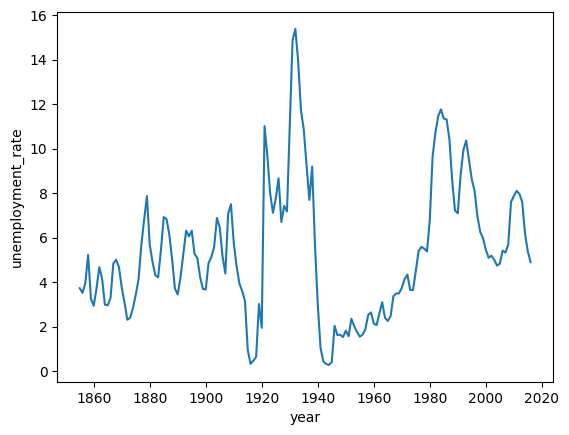

In [36]:
# excluir linhas sem valores
df = df.dropna()

#alterar tipo de dados para numérico
df['year'] = df['year'].astype(int)
df['population'] = df['population'].astype(float)
df['unemployment_rate'] = df['unemployment_rate'].astype(float)

import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df, x='year', y='unemployment_rate')
plt.show()

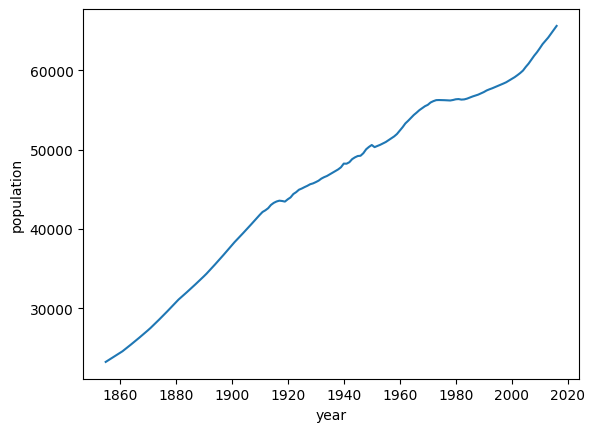

In [37]:
sns.lineplot(data=df, x='year', y='population')
plt.show()

 - PySpark

In [42]:
data = spark.read.csv("uk-macroeconomic-data.csv", header=True, sep=',')
data.show()

+-----------+------------------------------------+-----------------------------------+-------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------+------------------------------------------------------------------------------+----------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------+--------------------+--------------------+--------------------------+-------------------------------------------------+--------------------+--------------------+---------------------------------------+-------------------------------+---------------------------------+------------------+--------------------+----------+-----------------+---------------------------+------------------------------

In [43]:
# selecionar colunas
data = data.select("Description", "Population (GB+NI)", "Unemployment rate")

# renomear colunas
data = data.withColumnRenamed("Description", "year") \
          .withColumnRenamed("Population (GB+NI)", "population") \
          .withColumnRenamed("Unemployment rate", "unemployment_rate")


data.show(n=5)

# reordenar em SPark

+-----+----------+-----------------+
| year|population|unemployment_rate|
+-----+----------+-----------------+
|Units|      000s|                %|
| 1209|      null|             null|
| 1210|      null|             null|
| 1211|      null|             null|
| 1212|      null|             null|
| 1213|      null|             null|
| 1214|      null|             null|
| 1215|      null|             null|
| 1216|      null|             null|
| 1217|      null|             null|
| 1218|      null|             null|
| 1219|      null|             null|
| 1220|      null|             null|
| 1221|      null|             null|
| 1222|      null|             null|
| 1223|      null|             null|
| 1224|      null|             null|
| 1225|      null|             null|
| 1226|      null|             null|
| 1227|      null|             null|
+-----+----------+-----------------+
only showing top 20 rows



In [44]:
# retorna todas as colunas
data.printSchema()


root
 |-- year: string (nullable = true)
 |-- population: string (nullable = true)
 |-- unemployment_rate: string (nullable = true)



In [46]:
# criar nova tabela com linha de valor "%" na coluna 'unemployment_rate'
data_description = data.filter(data['unemployment_rate'] == "%")
data_description.show()

#Unir as tabelas para excluir a linha sem de unidades
from pyspark.sql.functions import broadcast
data = data.join(other=broadcast(data_description), on=['year'], how='left_anti')

data.show()

+----+----------+-----------------+
|year|population|unemployment_rate|
+----+----------+-----------------+
+----+----------+-----------------+

+----+----------+-----------------+
|year|population|unemployment_rate|
+----+----------+-----------------+
|1209|      null|             null|
|1210|      null|             null|
|1211|      null|             null|
|1212|      null|             null|
|1213|      null|             null|
|1214|      null|             null|
|1215|      null|             null|
|1216|      null|             null|
|1217|      null|             null|
|1218|      null|             null|
|1219|      null|             null|
|1220|      null|             null|
|1221|      null|             null|
|1222|      null|             null|
|1223|      null|             null|
|1224|      null|             null|
|1225|      null|             null|
|1226|      null|             null|
|1227|      null|             null|
|1228|      null|             null|
+----+----------+----------

In [47]:
#reordenar coluna por ano decrescente
from pyspark.sql.functions import col
data = data.orderBy(col("year").desc())
data.show()


+----+----------+-----------------+
|year|population|unemployment_rate|
+----+----------+-----------------+
|2016|     65573|             4.90|
|2015|     65110|             5.38|
|2014|     64597|             6.18|
|2013|     64106|             7.61|
|2012|     63705|             7.97|
|2011|     63285|             8.11|
|2010|     62759|             7.87|
|2009|     62260|             7.61|
|2008|     61824|             5.69|
|2007|     61319|             5.33|
|2006|     60827|             5.42|
|2005|     60413|             4.83|
|2004|     59950|             4.75|
|2003|     59637|             5.01|
|2002|     59366|             5.19|
|2001|     59113|             5.10|
|2000|     58886|             5.46|
|1999|     58684|             5.98|
|1998|     58475|             6.26|
|1997|     58314|             6.97|
+----+----------+-----------------+
only showing top 20 rows



In [52]:
# retirar valores nulos
data = data.dropna()

# criar coluna century
data = data.withColumn('century', 1 + (data['year']/100).cast('int'))

# exportar data para csv
data.repartition('century').write.csv('uk-macroeconomic-spark.csv', sep=',', header=True, mode='overwrite')

data.show()


+----+----------+-----------------+-------+
|year|population|unemployment_rate|century|
+----+----------+-----------------+-------+
|2016|     65573|             4.90|     21|
|2015|     65110|             5.38|     21|
|2014|     64597|             6.18|     21|
|2013|     64106|             7.61|     21|
|2012|     63705|             7.97|     21|
|2011|     63285|             8.11|     21|
|2010|     62759|             7.87|     21|
|2009|     62260|             7.61|     21|
|2008|     61824|             5.69|     21|
|2007|     61319|             5.33|     21|
|2006|     60827|             5.42|     21|
|2005|     60413|             4.83|     21|
|2004|     59950|             4.75|     21|
|2003|     59637|             5.01|     21|
|2002|     59366|             5.19|     21|
|2001|     59113|             5.10|     21|
|2000|     58886|             5.46|     21|
|1999|     58684|             5.98|     20|
|1998|     58475|             6.26|     20|
|1997|     58314|             6.